#Preprocessing

#Importing Libraris

In [1]:
import numpy as np  #for matrix Value
import matplotlib.pyplot as plt  # Data Visulization
import seaborn as sns # Data Visulization
import pandas as pd  #For Reading flie .CSV
from sklearn.model_selection import train_test_split #Cross validation and split data for train and test
from sklearn.ensemble import RandomForestRegressor #Algorthim to build model 
from sklearn.tree import DecisionTreeRegressor  #Algorthim to build model 
from sklearn.neighbors import KNeighborsRegressor #Algorthim to build model
from sklearn.linear_model import LinearRegression  #
from xgboost import XGBRegressor
from sklearn import metrics # Find erorr function 



#Data Collection and processing

In [2]:
#Loading  data to Pandas Dataframe
path='Cellphone.csv'
phone_price=pd.read_csv(path)
#print the 5 first row 
phone_price.head()


,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [3]:
#print the last 5 row 
phone_price.tail()


,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.0,12.0,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.0,20.0,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.0,20.0,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.0,20.0,8.0,3400,7.9
160,1131,2536,9807,202.0,6.00,367,8,1.500,16.0,3.0,21.5,16.0,2700,8.4


In [4]:
#know the num of rows and columns 
phone_price.shape

(161, 14)

In [5]:
#learn info about data
phone_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [6]:
#Finding if there data is null
phone_price.isnull().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [7]:
phone_price.drop(["Product_id"],axis=1)

,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,2357,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,1749,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,1916,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,1315,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,1749,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,3551,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,3211,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,3260,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,3211,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


In [8]:
#Finding statical mesuare
phone_price.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


Correlation: معامل الارتباط
1. Positive Correlation
2. Negative Correlation

In [9]:
correlation = phone_price.corr()

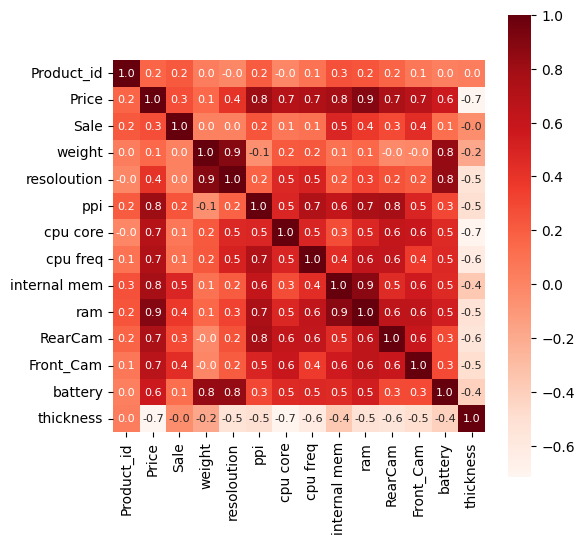

In [48]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (6,6))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Reds')
plt.show()

In [11]:
# correlation values of price
print(correlation['Price'])

Product_id      0.165136
Price           1.000000
Sale            0.273263
weight          0.144555
resoloution     0.404010
ppi             0.817614
cpu core        0.686811
cpu freq        0.727383
internal mem    0.776738
ram             0.896915
RearCam         0.739538
Front_Cam       0.675286
battery         0.559946
thickness      -0.716773
Name: Price, dtype: float64


C:\Users\lap shop\AppData\Local\Temp\ipykernel_11856\3288764779.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(phone_price['Price'],color='red')


<Axes: xlabel='Price', ylabel='Density'>

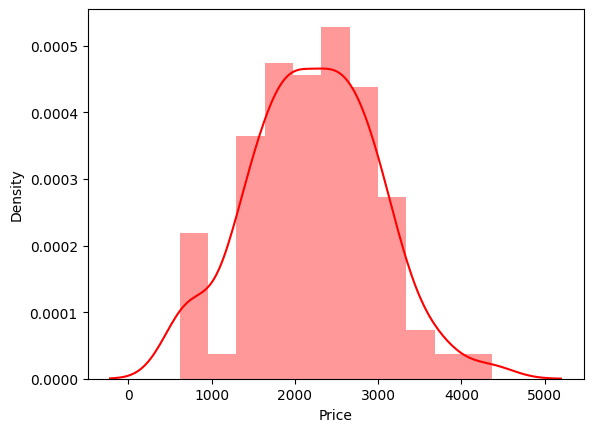

In [12]:
# checking the distribution of the phone Price
sns.distplot(phone_price['Price'],color='red')

In [13]:
X = phone_price.drop(['Price','Product_id'],axis=1)
Y = phone_price['Price']


In [14]:
print(X)

     Sale  weight  resoloution  ppi  cpu core  cpu freq  internal mem    ram   
0      10   135.0         5.20  424         8     1.350          16.0  3.000  \
1      10   125.0         4.00  233         2     1.300           4.0  1.000   
2      10   110.0         4.70  312         4     1.200           8.0  1.500   
3      11   118.5         4.00  233         2     1.300           4.0  0.512   
4      11   125.0         4.00  233         2     1.300           4.0  1.000   
..    ...     ...          ...  ...       ...       ...           ...    ...   
156  4638   178.0         5.46  538         4     1.875         128.0  6.000   
157  8016   170.0         5.50  534         4     1.975         128.0  6.000   
158  8809   150.0         5.50  401         8     2.200          64.0  4.000   
159  8946   170.0         5.50  534         4     1.975         128.0  6.000   
160  9807   202.0         6.00  367         8     1.500          16.0  3.000   

     RearCam  Front_Cam  battery  thick

In [15]:
print(Y)

0      2357
1      1749
2      1916
3      1315
4      1749
       ... 
156    3551
157    3211
158    3260
159    3211
160    2536
Name: Price, Length: 161, dtype: int64


Splitting into Training data and Test Data

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

#Model Training:

#Random Forest Regressor

In [17]:
model=RandomForestRegressor(n_estimators=120)
model.fit(X_train,Y_train)


RandomForestRegressor(n_estimators=120)

#Model Evalution:


In [18]:
predict_test=model.predict(X_test)
print(predict_test)

[1939.425      1516.55833333 2640.325      1292.71666667 1986.46666667
 2317.99166667 2245.85833333  657.74166667 1939.425      2695.45833333
 2868.6        2878.89166667 2695.45833333 1329.68333333 2955.
 1623.45833333 2220.70833333 2078.06666667 2776.85       1923.35833333
 2197.26666667 2659.15       2560.13333333 1623.45833333 1509.9
 3662.33333333 2842.725      1424.725      1753.6        1996.44166667
 2452.075      3116.71666667 1685.04166667]


In [19]:
model.score(X_train,Y_train)

0.9949167278569578

In [20]:
# R squared error
error_score = metrics.r2_score(Y_test, predict_test)
print("R squared error : ", error_score)

R squared error :  0.9615279254582646


Compare the Actual Values and Predicted Values in a Plot


In [21]:
Y_test = list(Y_test)

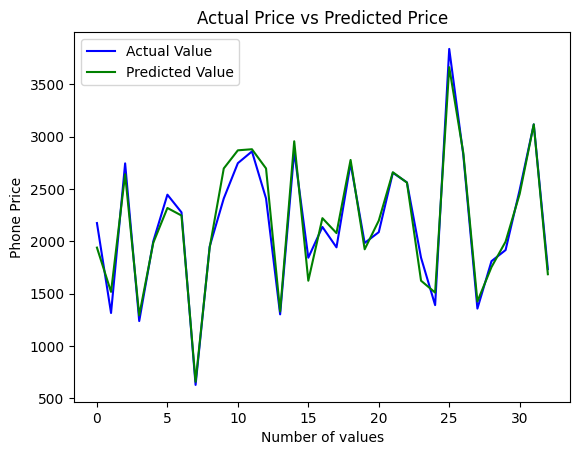

In [22]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(predict_test, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Phone Price')
plt.legend()
plt.show()

#LinearRegression

In [23]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

#Model Evalution:


In [24]:
predict_test=model.predict(X_test)
print(predict_test)

[1933.58570719 1354.46625925 2514.98832473 1364.19333255 1856.99347625
 2418.14164642 2335.87192633  355.58733378 1888.69386648 2331.36338224
 2876.73028852 2768.62773509 2330.67070594 1449.2339204  2956.92141992
 1566.03642401 2235.36160816 2212.64702804 2714.59008841 1982.5251606
 2309.09709393 2724.13690945 2450.48036229 1566.09754251 1702.30978288
 3645.87426901 2573.15826397 1363.39812451 1632.98598168 2029.77855793
 2522.91545536 3103.54166346 1521.29386361]


In [25]:
model.score(X_train,Y_train)

0.9568692096226847

In [26]:
# R squared error
error_score = metrics.r2_score(Y_test, predict_test)
print("R squared error : ", error_score)

R squared error :  0.9340232023846877


Compare the Actual Values and Predicted Values in a Plot


In [27]:
Y_test = list(Y_test)

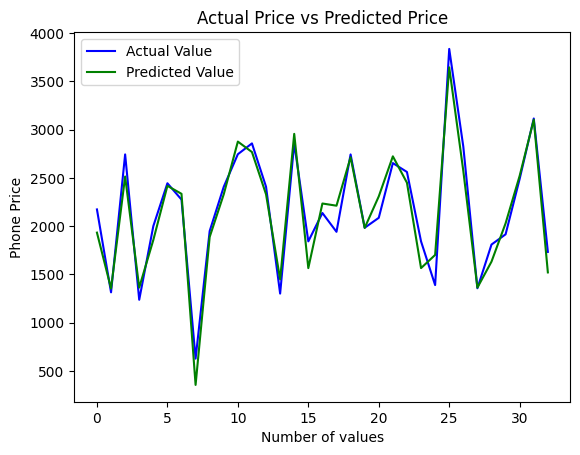

In [28]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(predict_test, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Phone Price')
plt.legend()
plt.show()

DecisionTreeRegressor


In [29]:
model=DecisionTreeRegressor(max_depth=10)
model.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=10)

#Model Evalution:


In [30]:
predict_test=model.predict(X_test)
print(predict_test)

[1831. 1315. 2744. 1238. 2001. 2445. 2276.  628. 1831. 2746. 2746. 2858.
 2746. 1302. 2859. 1390. 2137. 1942. 2744. 1984. 2087. 2654. 2562. 1390.
 1390. 3837. 2824. 1357. 1810. 1831. 2491. 3116. 1734.]


In [31]:
model.score(X_train,Y_train)

0.9997770473903117

In [32]:
# R squared error
error_score = metrics.r2_score(Y_test, predict_test)
print("R squared error : ", error_score)

R squared error :  0.9424840377990349


Compare the Actual Values and Predicted Values in a Plot


In [33]:
Y_test = list(Y_test)

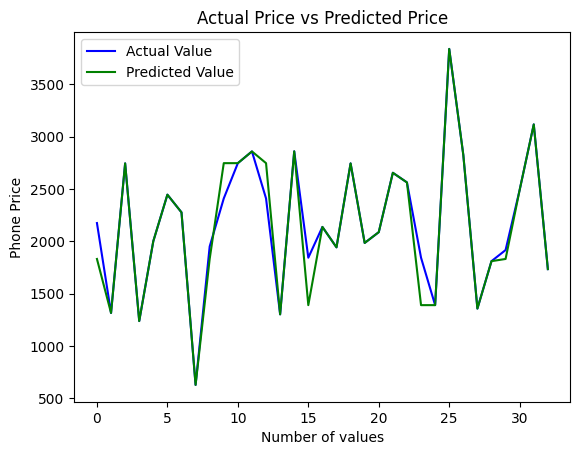

In [34]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(predict_test, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Phone Price')
plt.legend()
plt.show()

KNeighborsRegressor

In [35]:
model=KNeighborsRegressor()
model.fit(X_train,Y_train)

KNeighborsRegressor()

#Model Evalution:


In [36]:
predict_test=model.predict(X_test)
print(predict_test)

[1951.2 1339.4 2518.  1470.6 2373.8 2128.2 2237.2  709.2 1951.2 2261.
 2342.  2913.6 2261.  1470.6 3079.2 1470.6 2111.8 2377.2 2941.6 2624.8
 1909.4 2931.2 2649.8 1470.6 1616.4 3079.2 3043.4 1897.6 1838.  2137.8
 3092.2 2565.6 1857.6]


In [37]:
# R squared error
error_score = metrics.r2_score(Y_test, predict_test)
print("R squared error : ", error_score)

R squared error :  0.7468124460205099


Compare the Actual Values and Predicted Values in a Plot


In [38]:
Y_test = list(Y_test)

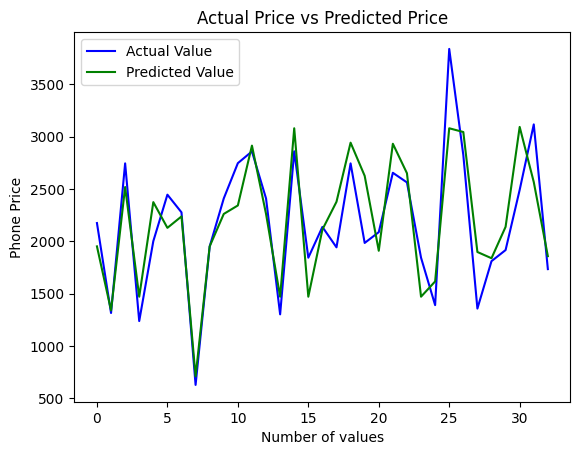

In [39]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(predict_test, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Phone Price')
plt.legend()
plt.show()

XGBRegressor

In [40]:
model=XGBRegressor()
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

#Model Evalution:


In [41]:
predict_test=model.predict(X_test)
print(predict_test)

[1821.3241 1353.4667 2743.9993 1201.6779 2001.0001 2438.937  2237.8215
  627.9993 1890.702  2477.6743 2745.8198 2843.0015 2477.6743 1302.4426
 2848.7114 1377.9088 2136.9985 1942.3142 2750.5857 1983.0908 2097.9292
 2654.0012 2562.0005 1378.118  1390.3983 3836.9873 2820.4487 1357.0009
 1809.9308 2094.0322 2491.     3012.6218 1733.9991]


In [42]:
# R squared error
error_score = metrics.r2_score(Y_test, predict_test)
print("R squared error : ", error_score)

R squared error :  0.9543083242728597


Compare the Actual Values and Predicted Values in a Plot


In [43]:
Y_test = list(Y_test)

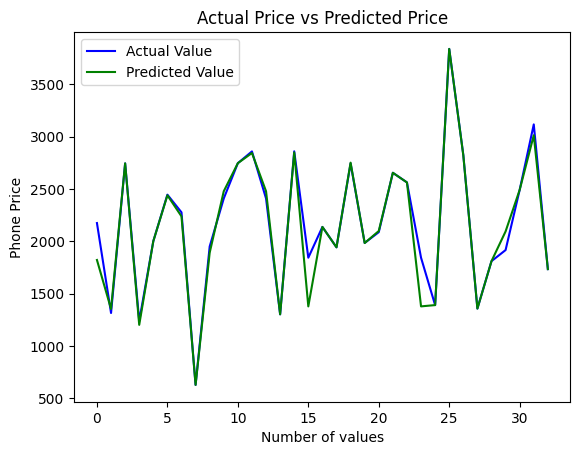

In [44]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(predict_test, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Phone Price')
plt.legend()
plt.show()